In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Data sets\\data scientist.csv")

In [3]:
df.head()

,No.,Subject Code,ISO ID,Aliquot number,Visit,Volume provided (ul),Box,Position,Group,Remarks,...,hsa-miR-185-5p,hsa-miR-421,hsa-miR-628-5p,hsa-miR-3912-3p,hsa-miR-192-3p,hsa-miR-340-3p,hsa-miR-451a,hsa-miR-199a-3p,hsa-miR-17-3p,hsa-miR-365a-5p
0,234,NBB0987/GCS,TC001,Plasma-1,Baseline,500,A Group Box1,B8,A,NaN,...,24.498373,19.221303,16.229505,13.171829,12.559431,15.230967,32.556859,24.194348,19.892575,19.107364
1,519,TBB0215/RTB,TC002,Plasma-1,Baseline,500,AA Group Box2,A4,AA,NaN,...,24.283489,18.985075,16.055242,13.856360,12.478251,15.517929,32.401758,23.435709,19.606120,19.475602
2,204,TC0245/NSM,TC003,Plasma-1,Baseline,500,CRC Box 3,E6,CRC,NaN,...,23.682307,17.929571,15.234474,12.547761,13.415850,14.038877,31.944128,22.295617,18.904924,18.364626
3,328,TBB0108/CHC,TC004,Plasma-1,Baseline,500,A Group Box2,D3,A,NaN,...,25.063000,20.044156,17.226877,14.629492,12.994056,16.419092,32.651362,25.321996,20.494205,19.487109
4,511,NBB4709/TPL,TC005,Plasma-1,Baseline,500,AA Group Box1,I5,AA,NaN,...,24.758416,19.273908,16.365436,13.138726,13.687365,15.765758,33.029370,23.286055,19.863147,20.110713


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 429 entries, No. to hsa-miR-365a-5p
dtypes: float64(374), int64(9), object(46)
memory usage: 2.6+ MB


In [5]:
df.isnull().sum()

No.                0
Subject Code       0
ISO ID             0
Aliquot number     0
Visit              0
                  ..
hsa-miR-340-3p     0
hsa-miR-451a       0
hsa-miR-199a-3p    0
hsa-miR-17-3p      0
hsa-miR-365a-5p    0
Length: 429, dtype: int64

In [6]:
df.Type

0            A
1           AA
2          CRC
3            A
4           AA
        ...   
795    Control
796        CRC
797          A
798    Control
799          A
Name: Type, Length: 800, dtype: object

In [7]:
x = df.drop('Type',axis=1).iloc[:,56:] #independent features
y = (df['Type']=='Control').astype(int) # dependent features

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import OneHotEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer

In [10]:
numerical_cols = x.columns
categorical_cols = []

In [11]:
## feature Engineering Automation
## Numerical Pipelines
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##Missing Values
        ('scaler',StandardScaler()) ## feature Scaling
    ]

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
                ('onehotencoder',OneHotEncoder()) ## Categorical features to numerical
                ]

            )  


In [12]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [13]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.

In [50]:
## Model Training Automation
models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
  
}

In [51]:
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix,classification_report

In [56]:
def evaluate_model(X_train,y_train,X_test,y_test,models,threshold=0.5):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            
        cm = confusion_matrix(y_test, y_test_pred)
        print("Confusion Matrix ({})".format(i))
        print(cm) 
        
         # Calculate the probabilities for ROC curve
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            raise ValueError("Model does not support predict_proba method.")
        
        # Apply threshold to model predictions
        y_pred_threshold = (y_prob >= threshold).astype(int)

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve ({})'.format(i))
        plt.show()
        
    return report

In [57]:
classfier=RandomForestClassifier()

Confusion Matrix (0)
[[125   1]
 [ 34   0]]


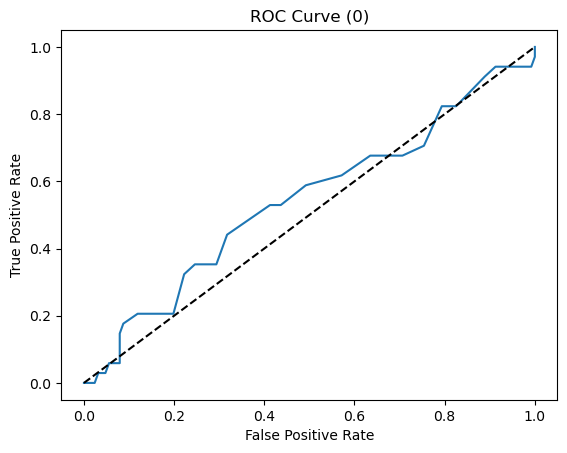

Confusion Matrix (1)
[[90 36]
 [27  7]]


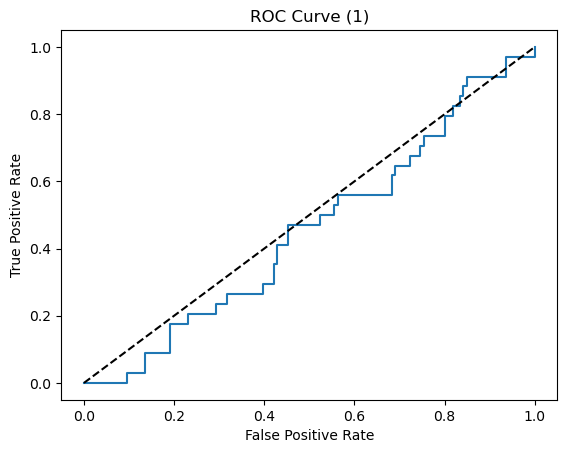

Confusion Matrix (2)
[[91 35]
 [19 15]]


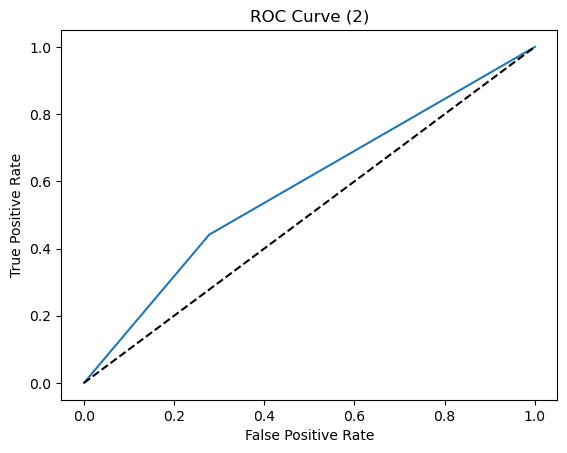

{'Random Forest': 0.78125,
 'Logistic Regression': 0.60625,
 'Decision Tree': 0.6625}

In [58]:
evaluate_model(X_train,y_train,X_test,y_test,models,threshold=0.5)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
## Hypeparameter Tuning
params={'max_depth':[3,6,7,10],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [22]:
cv=RandomizedSearchCV(classfier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.727 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.734 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.734 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.734 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=6, n_estimators=100;, score=0.734 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.734 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.734 total time=   2.2s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.734 total time=   2.3s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.734 total time=   2.2s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=300;, score=0.734 total time=   1.8s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 7, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [23]:
cv.best_params_

{'n_estimators': 300, 'max_depth': 10, 'criterion': 'entropy'}

In [24]:
parameters={'penalty':('l1','l2','elasticnet',None),'C':[1,10,20]}

In [25]:
classifier=LogisticRegression(C=1,penalty='l2')

In [26]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [27]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [28]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [29]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1)

In [30]:
## Prediction 
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[90 27]
 [36  7]]
0.60625
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       117
           1       0.21      0.16      0.18        43

    accuracy                           0.61       160
   macro avg       0.46      0.47      0.46       160
weighted avg       0.58      0.61      0.59       160

